In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install transformers is used to quickly install the "transformers"
# library in Python, which provides access to pre-trained models
# and powerful tools for natural language processing tasks.
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.5 MB/s eta 0:00:00


## Importing the required dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import time
import regex
import string
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score,accuracy_score,classification_report
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [10]:
import pandas as pd

In [12]:
df = pd.read_csv(r"D:\CloudSEK\test.csv")

In [13]:
df.shape

(39527, 3)

In [14]:
df.shape

(39527, 3)

In [16]:
df.iloc[2245]['Category']

'PARENTING'

In [ ]:
df = df.drop_duplicates()
df.dropna(inplace = True)
unique_categories = list(df['Category'].unique())
l =[]
for i in (unique_categories):
    a = df[df['Category'] == i]
    a = a.sample(frac=0.25, random_state=42)
    l.append(a)

df = pd.concat(l)
df.reset_index(inplace = True)
df.drop(columns =  'index',inplace = True)

In [ ]:
df

,Headline,Category,Summary
0,Couple Married For 68 Years Dies In Colorado W...,U.S. NEWS,A relative said they were found in each other'...
1,Volunteer Army Helps Florida Elders Book Covet...,U.S. NEWS,Volunteers are helping older people clear the ...
2,Frustration In Colorado City As Cop Found Drun...,U.S. NEWS,A district attorney has complained that he was...
3,9/11 First Responder Who Asked Congress To Ext...,U.S. NEWS,Luis Alvarez appeared alongside Jon Stewart at...
4,U.S. To Screen Airline Passengers From China F...,U.S. NEWS,The new virus that has sickened dozens and kil...
...,...,...,...
37544,Custody Battles: The Top Five Things Dads Shou...,DIVORCE,You are an active dad -- way beyond changing a...
37545,Why Marriage Can Be Better the Second Time Around,DIVORCE,"Regardless of the reasons, the numbers are cle..."
37546,A Single Mom By Any Other Name Is An ... Um .....,DIVORCE,Sometimes if I've been in a group of new peopl...
37547,David Tutera Divorce: Why He And Ex Ryan Juric...,DIVORCE,Tutera isn't the first celeb to be involved in...


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(37549, 3)

In [ ]:
# Checking the null values of the dataset
df.isnull().sum()

Headline    0
Category    0
Summary     0
dtype: int64

In [ ]:
  # Checking the total number of duplicated values in the dataset
df.duplicated().sum()

0

In [ ]:
# Checking the count of each items in the Category	 feature
df['Category'].value_counts()

POLITICS          8107
ENTERTAINMENT     3507
WELLNESS          2220
TRAVEL            1355
HEALTHY LIVING    1316
QUEER VOICES      1251
PARENTING         1122
BUSINESS          1052
SPORTS            1011
COMEDY             979
STYLE & BEAUTY     949
BLACK VOICES       942
THE WORLDPOST      916
FOOD & DRINK       912
PARENTS            879
WORLD NEWS         824
WOMEN              784
IMPACT             668
CRIME              647
MEDIA              600
WEIRD NEWS         579
HOME & LIVING      554
GREEN              511
TASTE              485
RELIGION           470
DIVORCE            465
WEDDINGS           446
STYLE              391
TECH               391
U.S. NEWS          344
SCIENCE            341
ARTS & CULTURE     334
WORLDPOST          310
GOOD NEWS          260
FIFTY              260
LATINO VOICES      256
COLLEGE            230
EDUCATION          226
ARTS               216
ENVIRONMENT        210
CULTURE & ARTS     149
MONEY               80
Name: Category, dtype: int64

In [ ]:
df.shape

(37549, 3)

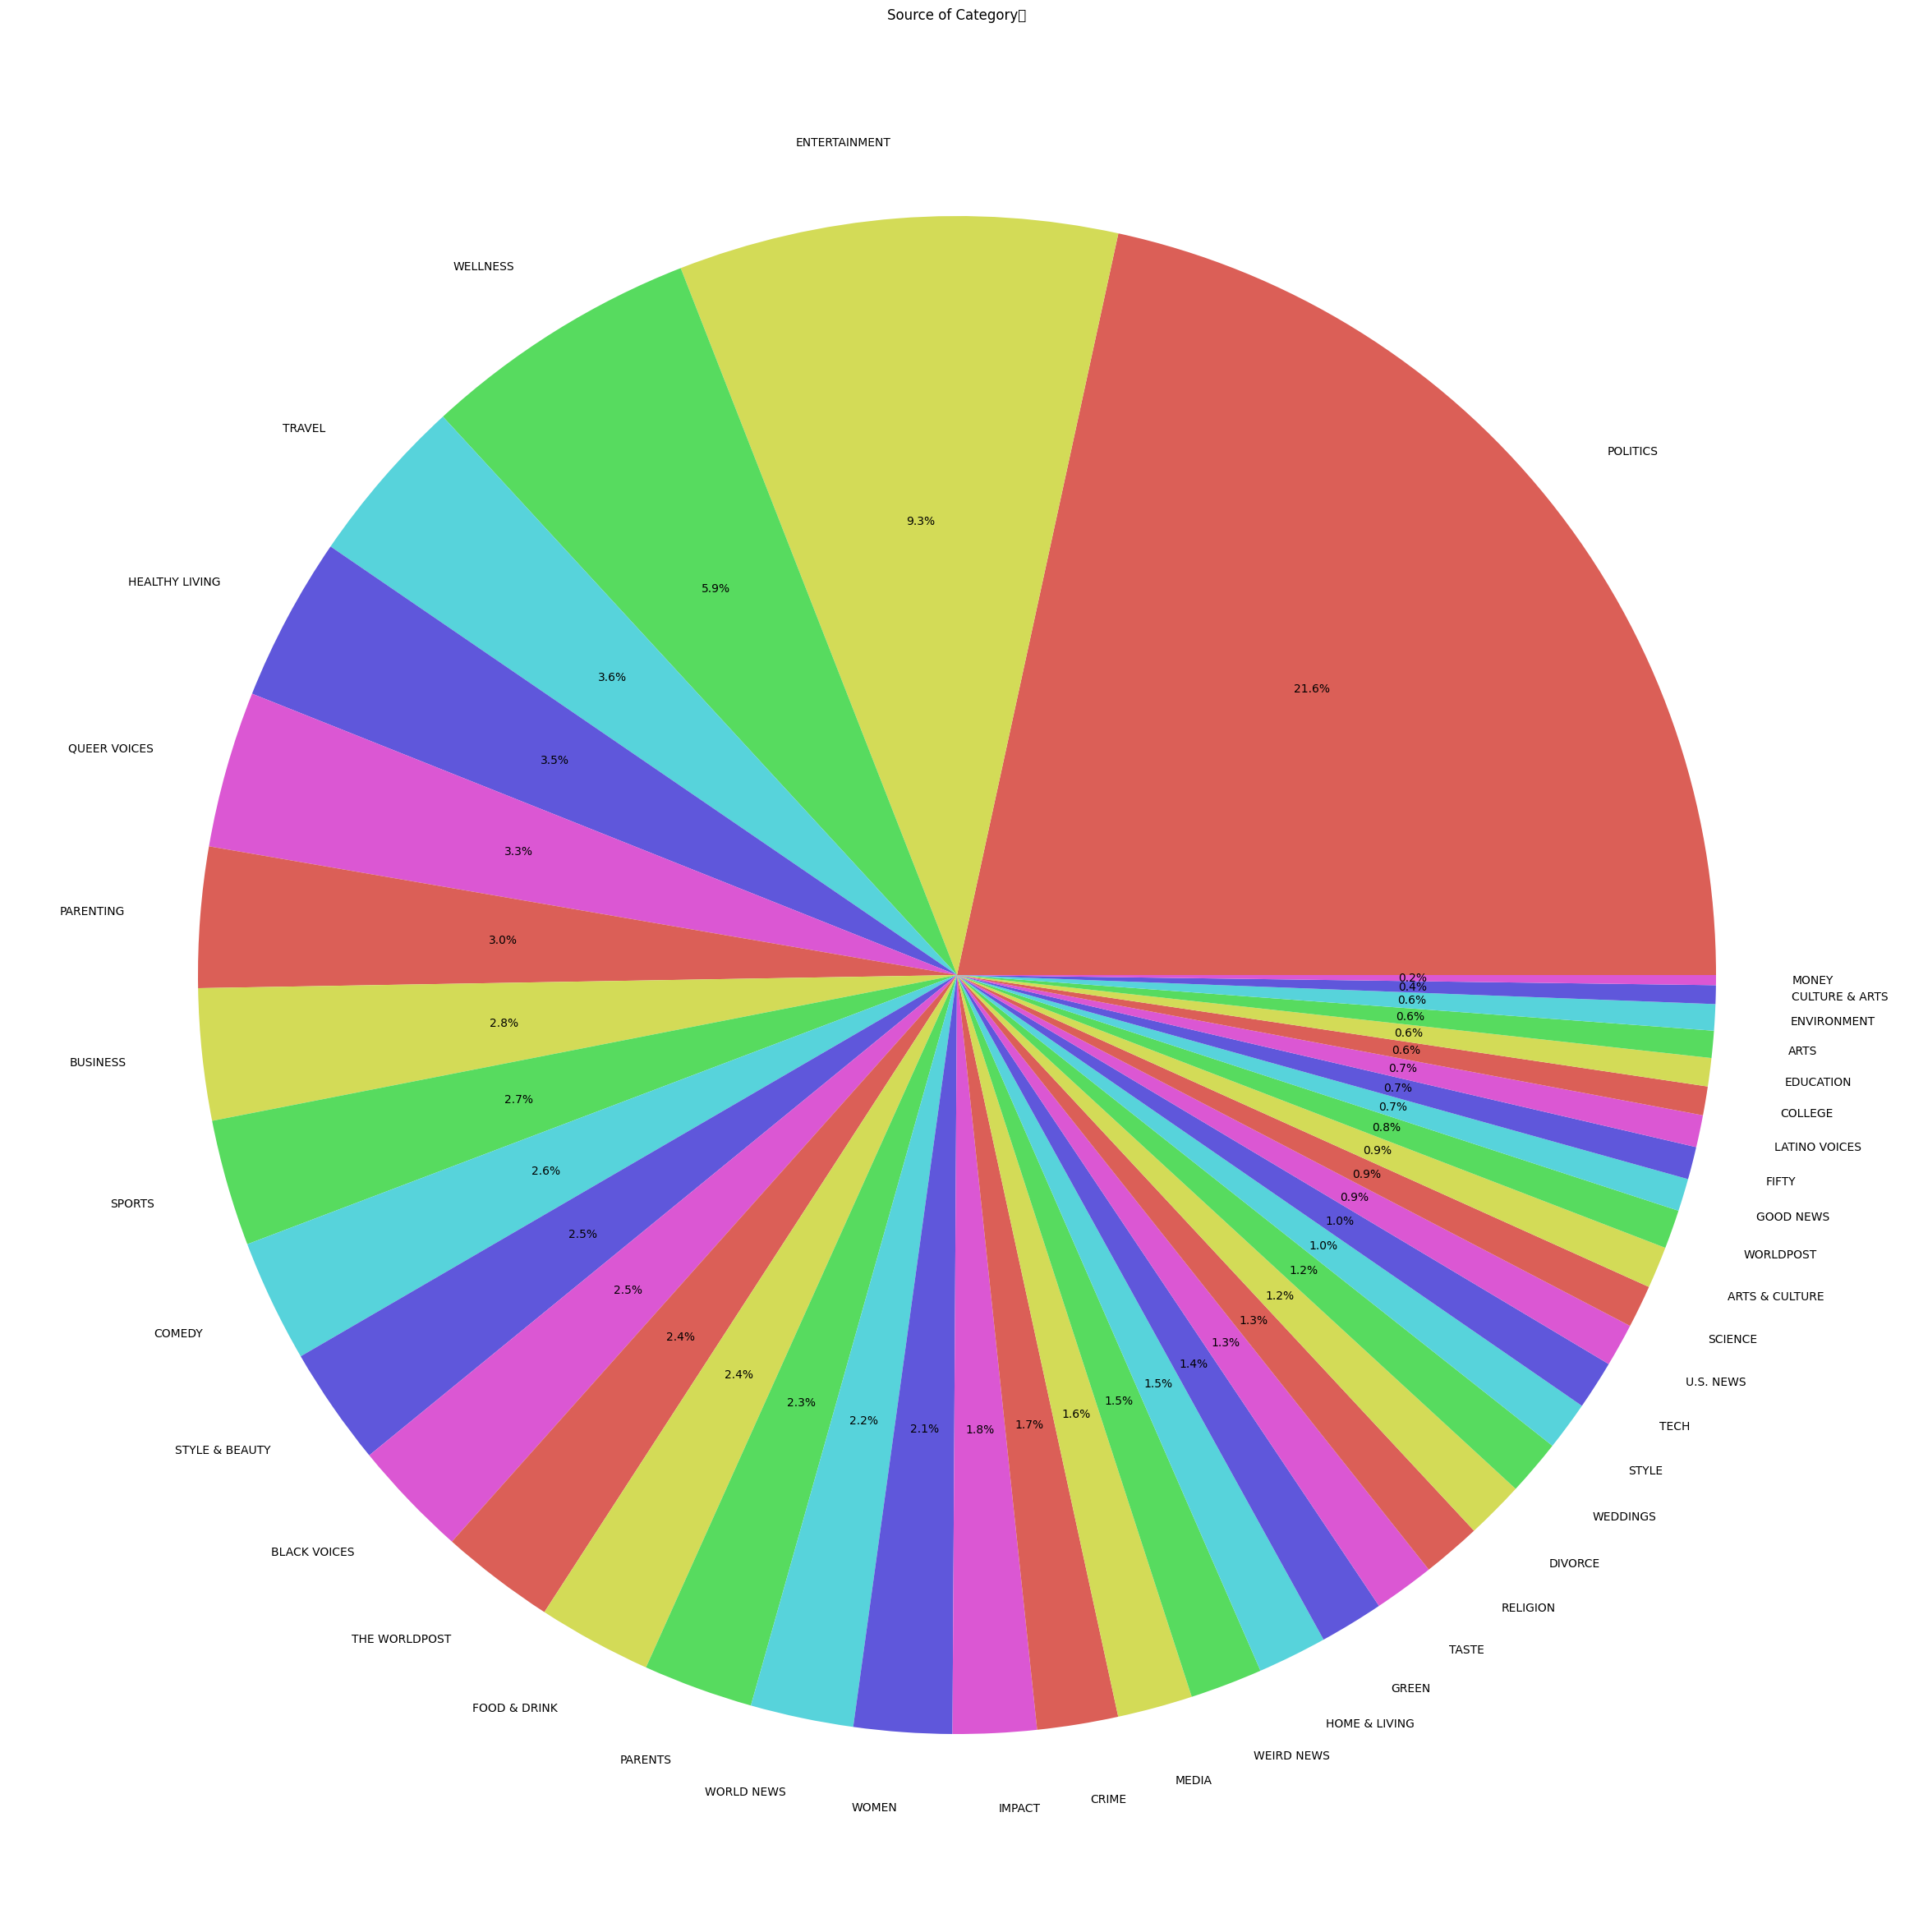

In [ ]:
# Plotting the unique value of the Category	 feature using a pie chart
plt.figure(figsize = (30,30))
counts = df['Category'].value_counts()
plt.pie(counts,labels = counts.index,autopct = "%1.1f%%",colors = sns.color_palette('hls'))
plt.title("Source of Category	")
plt.show()

In [ ]:
# pip install nltk is used to install the Natural Language Toolkit (NLTK) library in Python, which provides
# powerful tools for processing and analyzing human language data, particularly in the field of natural language processing (NLP).
!pip install nltk
nltk.download('stopwords')
stop_list = set(stopwords.words("english"))

# The provided code installs and sets up spaCy,
# a library for natural language processing in Python.
# It downloads the English language model, enabling you to perform various NLP tasks with ease.
!pip install -U spacy
import spacy
import blis
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2023-09-26 11:22:52.615205: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#label_encoder = preprocessing.LabelEncoder() is used to transform categorical labels into numerical values, making them usable in machine learning models.
label_encoder =  preprocessing.LabelEncoder()
df["Category"] = df['Category']
df['Category_encoded'] = label_encoder.fit_transform(df['Category']).astype(int)

In [ ]:
# Stroing labelEncoded Values in a y variable
y = df['Category'].values

In [ ]:
map_dic = dict(zip(df["Category_encoded"],df["Category"]))

In [ ]:

# The code imports the required libraries, torch and transformers,
# to work with pre-trained BERT models and perform sequence classification tasks using BERT's capabilities.
import torch
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
df.head(2)

,Headline,Category,Summary,Category_encoded
0,Couple Married For 68 Years Dies In Colorado W...,U.S. NEWS,A relative said they were found in each other'...,35
1,Volunteer Army Helps Florida Elders Book Covet...,U.S. NEWS,Volunteers are helping older people clear the ...,35


In [ ]:
# The code initializes a BERT tokenizer and a BERT model for sequence classification
# using the 'bert-base-uncased' pre-trained version. The tokenizer is used to
# preprocess text data, while the model is a pre-trained neural network
# designed for sequence classification tasks, such as sentiment analysis or text categorization.

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=len(label_encoder.classes_))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_texts, train_labels = df['Summary'].tolist(), df['Category_encoded'].tolist()

In [ ]:
# Tokenize the texts and convert them to input tensors
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256, return_tensors='pt')
train_dataset = TensorDataset(train_encodings.input_ids, train_encodings.attention_mask, torch.tensor(train_labels))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [ ]:
# Move the model to the appropriate device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Define the optimizer and criterion

optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()


# Training Loop

num_epochs = 4

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Average Training Loss: {avg_train_loss:.4f}')

Epoch 1/4 - Average Training Loss: 2.1966
Epoch 2/4 - Average Training Loss: 1.6056
Epoch 3/4 - Average Training Loss: 1.2152
Epoch 4/4 - Average Training Loss: 0.8637


In [ ]:
# Evaluation

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        _, predicted = torch.max(logits, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

In [ ]:
dic = dict(zip(df['Category'],df['Category_encoded']))
y_pred_category=  [key for num in y_pred for key, value in dic.items() if value == num]
y_true_category= [key for num in y_true for key, value in dic.items() if value == num]

In [ ]:
# Plotting the unique value of the category predicted feature using a plotly pie chart
dic_pred_y = {"y_pred__label":y_pred_category}
df_pred_y = pd.DataFrame.from_dict(dic_pred_y)
counts = df_pred_y['y_pred__label'].value_counts()
fig = go.Figure(data = [go.Pie(labels = counts.index,values = counts)])
fig.update_layout(title = "Source of category_pred")
fig.show()

In [ ]:
# Plotting the unique value of the y_true_category predicted feature using a plotly pie chart
dic_pred_true_y = {"y_pred__label":y_true_category}
df_pred_true_y = pd.DataFrame.from_dict(dic_pred_true_y)
counts = df_pred_true_y['y_pred__label'].value_counts()
fig = go.Figure(data = [go.Pie(labels = counts.index,values = counts)])
fig.update_layout(title = "Source of category List_True")
fig.show()

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
print("Train Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

Train Accuracy: 87.40%
                precision    recall  f1-score   support

          ARTS       0.79      0.94      0.85       216
ARTS & CULTURE       0.91      0.72      0.80       334
  BLACK VOICES       0.91      0.75      0.82       942
      BUSINESS       0.90      0.90      0.90      1052
       COLLEGE       0.74      0.70      0.72       230
        COMEDY       0.86      0.80      0.83       979
         CRIME       0.83      0.94      0.88       647
CULTURE & ARTS       0.94      0.59      0.72       149
       DIVORCE       0.92      0.94      0.93       465
     EDUCATION       0.89      0.74      0.81       226
 ENTERTAINMENT       0.88      0.95      0.92      3507
   ENVIRONMENT       0.98      0.60      0.74       210
         FIFTY       0.83      0.75      0.79       260
  FOOD & DRINK       0.70      0.96      0.81       912
     GOOD NEWS       0.77      0.42      0.54       260
         GREEN       0.77      0.89      0.82       511
HEALTHY LIVING       0.8

# Single Input Prediction system

In [ ]:
import torch

def predict_single_input(model, input_paragraph, device):
    model.eval()

    # Ensure the model and input tensors are on the same device
    model = model.to(device)

    # Tokenize the input paragraph
    inputs = tokenizer(input_paragraph, truncation=True, padding=True, max_length=256, return_tensors='pt')
    input_ids, attention_mask = inputs.input_ids.to(device), inputs.attention_mask.to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)
        predicted_label = label_encoder.classes_[predicted.item()]

    return predicted_label

# Example usage of the predict_single_input function
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
input_paragraph = "OPINION: The current stock market situation is worrisome."
predicted_label = predict_single_input(model, input_paragraph, device)
print(f"Predicted Label: {predicted_label}")

Predicted Label: BUSINESS


In [ ]:
# Save the pre-trained model
def save_model(model, path):
    model.to('cpu')  # Move the model to CPU before saving
    torch.save(model.state_dict(), path)

In [ ]:
# Load the pre-trained model
def load_model(model_class, num_labels, path):
    model = model_class.from_pretrained('bert-base-uncased', num_labels=num_labels)
    model.load_state_dict(torch.load(path))
    model.to(device)  # Move the model back to the appropriate device
    return model

In [ ]:
# Save the pre-trained model
save_model(model, '/content/drive/MyDrive/Colab Notebooks/CloudSEK/pretrained_model_2.pt')

In [ ]:
# Load the pre-trained model
loaded_model = load_model(BertForSequenceClassification, len(label_encoder.classes_), '/content/drive/MyDrive/Colab Notebooks/CloudSEK/pretrained_model_2.pt')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Example usage of the predict_single_input function with the loaded model
input_paragraph = df["Summary"].iloc[29862]
predicted_label = predict_single_input(loaded_model, input_paragraph,device)
print(f"Predicted Label: {predicted_label}")

Predicted Label: IMPACT


In [ ]:
df.iloc[29862]

Headline                                     I Am an American Cupcake
Category                                                       IMPACT
Summary             I am a white, educated, middle class American ...
Category_encoded                                                   18
Name: 29862, dtype: object

In [9]:
df["Summary"].iloc[2862]

'"Ohioans, when you\'re visiting your loved one\'s grave, remember Jim Jordan was laughing at them," one critic fired back at the Ohio Republican.'

In [11]:
df["Category"].iloc[2862]

'POLITICS'

In [ ]:
df['Category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [ ]:
df[df["Category"] == "IMPACT"]

,Headline,Category,Summary,Category_encoded
29862,I Am an American Cupcake,IMPACT,"I am a white, educated, middle class American ...",18
29863,"The Flint Crisis Will Last Decades, And These ...",IMPACT,"""People understand this need, and they underst...",18
29864,Painter Recreates 'The Last Supper' With A Tab...,IMPACT,"""I suppose for any one of us this might be our...",18
29865,What Is Needed for Youth Entrepreneurship in M...,IMPACT,Youth entrepreneurship is of particular import...,18
29866,Service And Opportunity Go Hand In Hand,IMPACT,That moment struck to the core of why I was in...,18
...,...,...,...,...
30525,The Real Noah's Ark,IMPACT,"A bear, a lion and a tiger. The closest shared...",18
30526,Retired Great-Grandma Spent The Summer Bringin...,IMPACT,"""We're all put on this Earth to do something.""",18
30527,The Time is Ripe for a Nonprofit Revolution,IMPACT,Local government leaders can help to foster su...,18
30528,An Open Letter to Kim Kardashian,IMPACT,"The point is, while preeclampsia, might be rel...",18
